Python 3.10.7

## Image To Biner

void biner(citra A, citra_biner B, int T, int M, int N)
/* Membuat citra biner dari citra A berdasarkan nilai ambang
(threshold) T yang dispesifikasikan. Ukuran citra adalah M
 N.
citra_biner adalah tipe data untuk citra biner).
*/
{ int i, j;
citra_biner B;
for (i=0; i<=M-1; i++)
for (j=0; j<=N-1; j++)
{
if (A[i][j] < T)
B[i][j] = 0;
else
B[i][j] = 1;
}
}

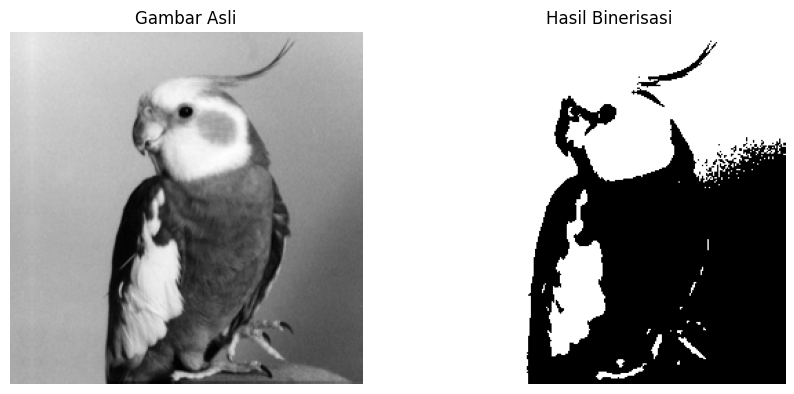

In [91]:
import numpy as np
import matplotlib.pyplot as plt

def binerisasi_citra(A, T):
    """Membuat citra biner berdasarkan threshold T."""
    M, N = A.shape  # Ukuran citra
    B = np.zeros((M, N), dtype=np.uint8)  # Inisialisasi citra biner

    for i in range(M):
        for j in range(N):
            if A[i, j] < T:
                B[i, j] = 0
            else:
                B[i, j] = 255  # Agar lebih terlihat sebagai citra biner
    return B

# 1️⃣ Baca gambar dengan Matplotlib
image = plt.imread("bird.bmp")  # Membaca gambar menggunakan Matplotlib

# 2️⃣ Tetapkan nilai threshold (misalnya T = 128)
T = 128

# 3️⃣ Lakukan binerisasi
binary_image = binerisasi_citra(image, T)

# 4️⃣ Tampilkan hasil dengan Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")  # Menampilkan gambar asli
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap="gray")  # Menampilkan hasil binerisasi
plt.title("Hasil Binerisasi")
plt.axis("off")

plt.show()

## Negative Image

void negatif(citra A, citra B, int M, int N)
/* Membuat citra negatif dari citra A. Hasilnya disimpan di
dalam citra B. Ukuran citra adalah M
 N.
*/
{ int i, j;
for (i=0; i<=M-1; i++)
for (j=0; j<=N-1; j++)
{
B[i][j] = 255 - A[i][j];
}
}

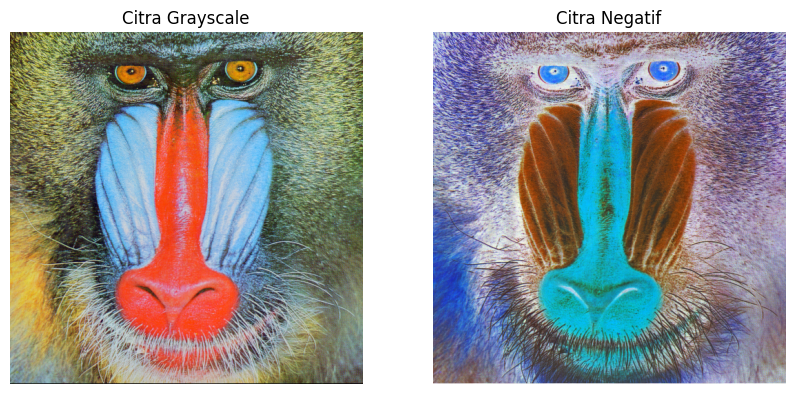

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def negatif_citra(A):
    """Menghasilkan citra negatif dari citra grayscale A."""
    return 255 - A  # Operasi negatif

# 1️⃣ Baca gambar dengan Matplotlib
image = plt.imread("baboon24.bmp")  # Baca gambar

# 3️⃣ Proses negatif
negative_image = negatif_citra(image)

# 4️⃣ Tampilkan hasil
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Citra Grayscale")
plt.axis("off")

# Gambar negatif
plt.subplot(1, 2, 2)
plt.imshow(negative_image, cmap="gray")
plt.title("Citra Negatif")
plt.axis("off")

plt.show()


## Image Brightening

void image_brightening(citra A, int b, citra B, int M, int N)
/* Pencerahan citra dengan menjumlahkan setiap pixel di dalam citra A dengan
sebuah skalar b. Hasil disimpan di dalam citra B. Citra berukuran M
 N. */
{ int i, j, temp;
for (i=0; i<=M-1; i++)
for (j=0; j<=N-1; j++)
{
temp = A[i][j] + b;
/* clipping */
if (temp < 0)
B[i][j] = 0;
else
if (temp > 255)
B[i][j]=255;
else
B[i][j]=temp;
}
}

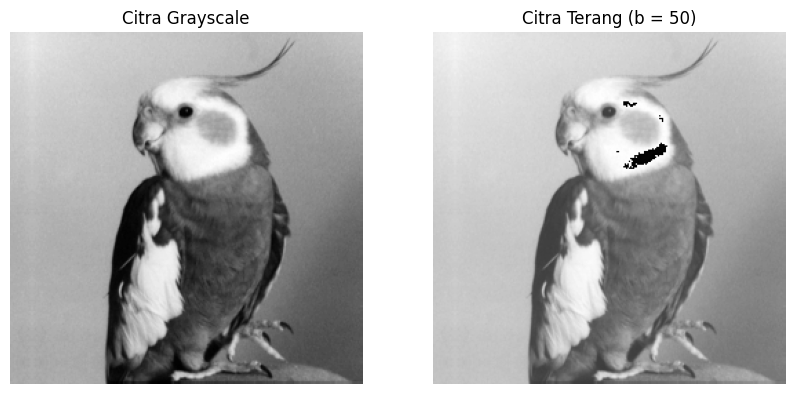

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def image_brightening(A, b):
    """Menambahkan nilai skalar b ke setiap piksel dengan clipping (0-255)."""
    B = A + b  # Menambahkan brightness
    B = np.clip(B, 0, 255)  # Clipping agar tetap dalam rentang 0-255
    return B.astype(np.uint8)  # Konversi ke tipe data citra

# 1️⃣ Baca gambar dengan Matplotlib
image = plt.imread("bird.bmp")  # Baca gambar

# 3️⃣ Pencerahan citra
b = 50  # Nilai peningkatan brightness
brightened_image = image_brightening(image, b)

# 4️⃣ Tampilkan hasil
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Citra Grayscale")
plt.axis("off")

# Gambar lebih terang
plt.subplot(1, 2, 2)
plt.imshow(brightened_image, cmap="gray")
plt.title(f"Citra Terang (b = {b})")
plt.axis("off")

plt.show()

## Image Addition

void addition(citra A, citra B, citra C, int M, int N)
/* Menjumlahkan dua buah citra A dan B menjadi citra baru, C.
Citra A, B, dan C masing-masing berukuran M
 N.
*/
{ int i, j, temp;
for (i=0; i<=M-1; i++)
for (j=0; j<=N-1; j++)
{
temp=A[i][j] + B[i][j];
if (temp > 255) C[i][j]=255; else C[i][j]=temp;
}
}

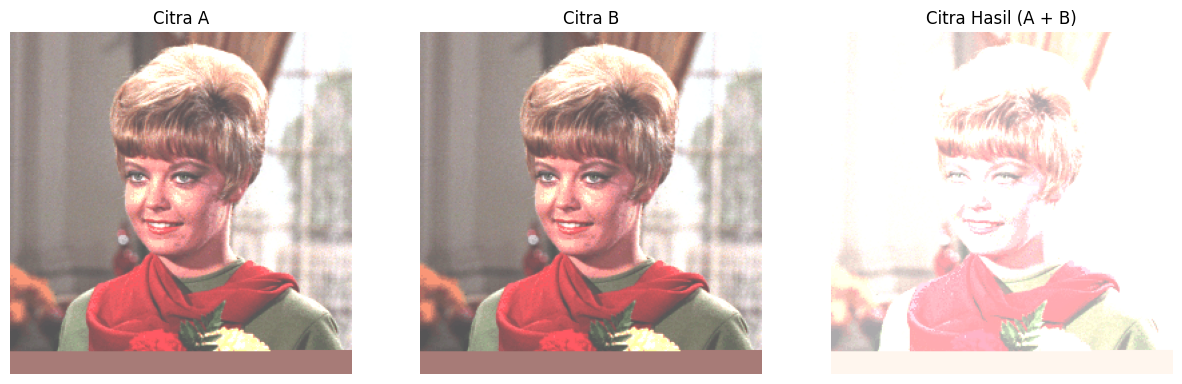

In [71]:
import numpy as np
import matplotlib.pyplot as plt

def addition(A, B):
    """Menjumlahkan dua citra sesuai algoritma dengan clipping (0-255)."""
    M, N, C = A.shape  # Mendapatkan ukuran citra (M, N) dan jumlah channel (C)
    result = np.zeros((M, N, C), dtype=np.uint8)  # Inisialisasi citra hasil

    for i in range(M):
        for j in range(N):
            for k in range(C):  # Iterasi setiap channel (R, G, B)
                temp = int(A[i, j, k]) + int(B[i, j, k])  # Penjumlahan
                if temp > 255:
                    result[i, j, k] = 255
                else:
                    result[i, j, k] = temp
    return result

# 1️⃣ Baca dua gambar dengan Matplotlib
image1 = plt.imread("girl-warna.bmp")
image2 = plt.imread("girl-warna.bmp")

# 2️⃣ Pastikan kedua gambar memiliki format uint8 (0-255)
if image1.dtype == np.float32 or image1.dtype == np.float64:
    image1 = (image1 * 255).astype(np.uint8)
if image2.dtype == np.float32 or image2.dtype == np.float64:
    image2 = (image2 * 255).astype(np.uint8)

# 3️⃣ Hilangkan alpha channel jika ada
if image1.shape[-1] == 4:  # Jika gambar memiliki alpha channel (RGBA)
    image1 = image1[:, :, :3]  # Ambil hanya R, G, B
if image2.shape[-1] == 4:
    image2 = image2[:, :, :3]

# 4️⃣ Pastikan ukuran kedua gambar sama
M = min(image1.shape[0], image2.shape[0])
N = min(image1.shape[1], image2.shape[1])
image1 = image1[:M, :N]
image2 = image2[:M, :N]

# 5️⃣ Lakukan penjumlahan citra
result_image = addition(image1, image2)

# 6️⃣ Tampilkan hasil dengan Matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image1)
plt.title("Citra A")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(image2)
plt.title("Citra B")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(result_image)
plt.title("Citra Hasil (A + B)")
plt.axis("off")

plt.show()


## Image Substraction

void substraction (citra A, citra B, citra C, int M, int N)
/* Mengurangkan dua buah citra A dan B menajdi citra baru, C.
Citra A, B, dan C berukuran M
 N.
*/
{ int i, j;
for (i=0; i<=M-1; i++)
for (j=0; j<=N-1; j++)
{
C[i][j]=A[i][j] - B[i][j];
if (C[i][j] != 0) C[i][j]=255; /* nyatakan objek berwarna putih */
}
}

C:\Users\asus\AppData\Local\Temp\ipykernel_15648\232649890.py:12: RuntimeWarning: overflow encountered in scalar subtract
  result[i, j, k] = A[i, j, k] - B[i, j, k]


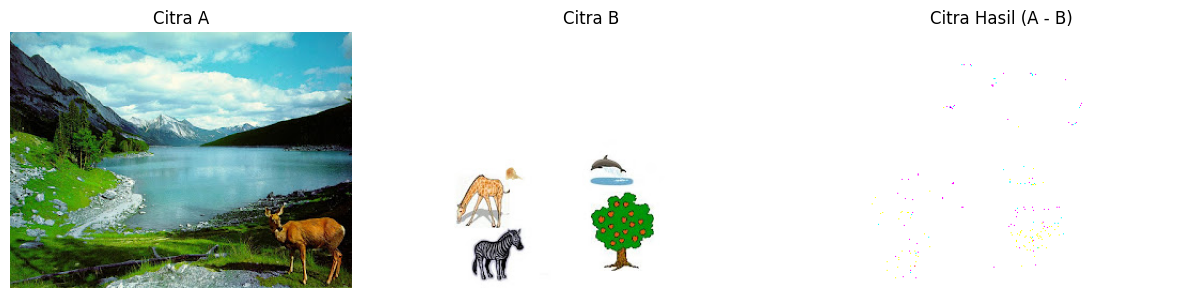

In [70]:
import numpy as np
import matplotlib.pyplot as plt

def subtraction(A, B):
    """Mengurangkan dua citra sesuai algoritma dengan hasil biner (0 atau 255)."""
    M, N, C = A.shape  # Mendapatkan ukuran citra (M, N) dan jumlah channel (C)
    result = np.zeros((M, N, C), dtype=np.uint8)  # Inisialisasi citra hasil

    for i in range(M):
        for j in range(N):
            for k in range(C):  # Iterasi setiap channel (R, G, B)
                result[i, j, k] = A[i, j, k] - B[i, j, k]
                if result[i, j, k] != 0:
                    result[i, j, k] = 255  # Jika hasil pengurangan bukan nol, set ke 255
    return result

# 1️⃣ Baca dua gambar dengan Matplotlib
image1 = plt.imread("img61.jpg")
image2 = plt.imread("Sample_Image.jpg")

# 2️⃣ Pastikan kedua gambar memiliki format uint8 (0-255)
if image1.dtype == np.float32 or image1.dtype == np.float64:
    image1 = (image1 * 255).astype(np.uint8)
if image2.dtype == np.float32 or image2.dtype == np.float64:
    image2 = (image2 * 255).astype(np.uint8)

# 3️⃣ Hilangkan alpha channel jika ada
if image1.shape[-1] == 4:  # Jika gambar memiliki alpha channel (RGBA)
    image1 = image1[:, :, :3]  # Ambil hanya R, G, B
if image2.shape[-1] == 4:
    image2 = image2[:, :, :3]

# 4️⃣ Pastikan ukuran kedua gambar sama
M = min(image1.shape[0], image2.shape[0])
N = min(image1.shape[1], image2.shape[1])
image1 = image1[:M, :N]
image2 = image2[:M, :N]

# 5️⃣ Lakukan pengurangan citra
result_image = subtraction(image1, image2)

# 6️⃣ Tampilkan hasil dengan Matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image1)
plt.title("Citra A")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(image2)
plt.title("Citra B")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(result_image)
plt.title("Citra Hasil (A - B)")
plt.axis("off")

plt.show()


## Image Multiplication

void multiplication(citra A, citra B, citra C, int M, int N)
/* Mengalikan citra A dengan citra B menjadi citra C.
Citra A, matriks B, dan hasil perkalian C berukuran M
 N.
*/
{ int i, j;
for (i=0; i<=M-1; i++)
for (j=0; j<=N-1; j++)
for (k=0; k<=N-1; k++)
{ C[i][j] = A[i][j]*B[i][j];
/* clipping */
if (C[i][j] < 0)
C[i][j] = 0;
else
if (C[i][j] > 255)
C[i][j]=255;
}
}

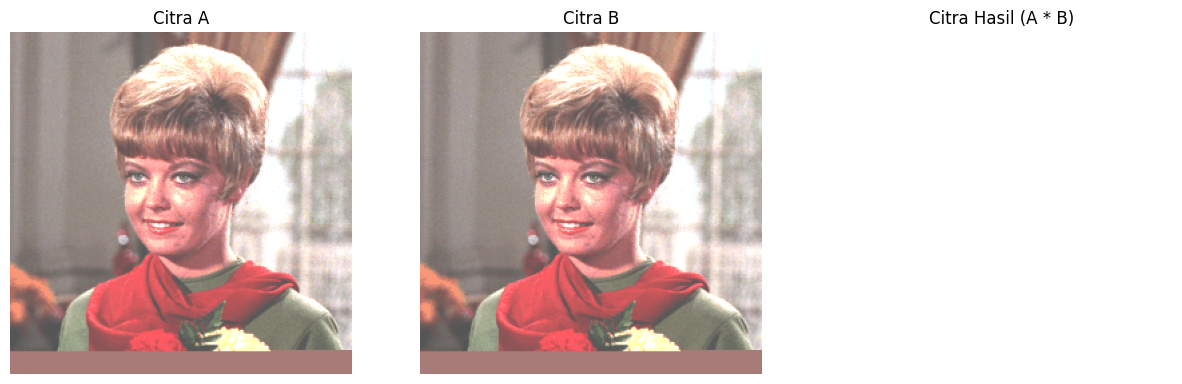

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def multiplication(A, B):
    """Mengalikan dua citra dengan clipping (0-255)."""
    M, N, C = A.shape  # Mendapatkan ukuran citra (M, N) dan jumlah channel (C)
    result = np.zeros((M, N, C), dtype=np.uint8)  # Inisialisasi citra hasil

    for i in range(M):
        for j in range(N):
            for k in range(C):  # Iterasi setiap channel (R, G, B)
                temp = int(A[i, j, k]) * int(B[i, j, k])  # Perkalian
                if temp < 0:
                    result[i, j, k] = 0
                elif temp > 255:
                    result[i, j, k] = 255
                else:
                    result[i, j, k] = temp
    return result

# 1️⃣ Baca dua gambar dengan Matplotlib
image1 = plt.imread("girl-warna.bmp")
image2 = plt.imread("girl-warna.bmp")

# 2️⃣ Pastikan kedua gambar memiliki format uint8 (0-255)
if image1.dtype == np.float32 or image1.dtype == np.float64:
    image1 = (image1 * 255).astype(np.uint8)
if image2.dtype == np.float32 or image2.dtype == np.float64:
    image2 = (image2 * 255).astype(np.uint8)

# 3️⃣ Hilangkan alpha channel jika ada
if image1.shape[-1] == 4:  # Jika gambar memiliki alpha channel (RGBA)
    image1 = image1[:, :, :3]  # Ambil hanya R, G, B
if image2.shape[-1] == 4:
    image2 = image2[:, :, :3]

# 4️⃣ Pastikan ukuran kedua gambar sama
M = min(image1.shape[0], image2.shape[0])
N = min(image1.shape[1], image2.shape[1])
image1 = image1[:M, :N]
image2 = image2[:M, :N]

# 5️⃣ Lakukan perkalian citra
result_image = multiplication(image1, image2)

# 6️⃣ Tampilkan hasil dengan Matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image1)
plt.title("Citra A")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(image2)
plt.title("Citra B")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(result_image)
plt.title("Citra Hasil (A * B)")
plt.axis("off")

plt.show()


## Boolean Operation NOT

void not(citra_biner A, citra_biner B, int M, int N)
/* Membuat citra komplemen dari citra biner A.
Komplemennya disimpan di dalam B. Ukuran citra A
adalah M
 N.
*/
{ int i, j;
for (i=0; i<=M-1; i++)
for (j=0; j<=N-1; j++)
{
B[i][j] = !A[i][j];
}
}

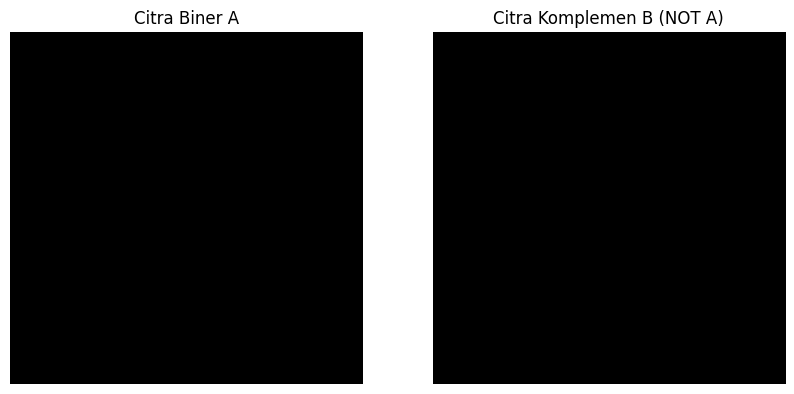

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def not_operation(A):
    """Membuat komplemen dari citra biner A."""
    M, N = A.shape  # Mendapatkan ukuran citra
    B = np.zeros((M, N), dtype=np.uint8)  # Inisialisasi citra hasil

    for i in range(M):
        for j in range(N):
            B[i, j] = 1 - A[i, j]  # Operasi NOT pada citra biner

    return B

# 1️⃣ Baca citra biner (asumsikan citra sudah dalam bentuk grayscale 0 dan 1)
image = plt.imread("bird.bmp")  # Baca gambar

# 2️⃣ Konversi ke biner (jika perlu)
if image.ndim == 3:  # Jika ada channel tambahan (RGB atau RGBA), konversi ke grayscale
    image = np.mean(image, axis=-1)  # Ambil rata-rata untuk grayscale

binary_image = (image > 0.5).astype(np.uint8)  # Thresholding (0 atau 1)

# 3️⃣ Lakukan operasi NOT
result_image = not_operation(binary_image)

# 4️⃣ Tampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap="gray")
plt.title("Citra Biner A")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(result_image, cmap="gray")
plt.title("Citra Komplemen B (NOT A)")
plt.axis("off")

plt.show()


## Image Translation

void translation(citra A, citra B, int M, int N, int m, int n)
/* Mentranslasi citra A sejauh m, n menjadi citra B. Ukuran citra M
 N. */
{ int i, j;
for (i=0; i<=M-1; i++)`
for (j=0; j<=N-1; j++)
{
B[i][j]=A[i+m][j+n];
}
}

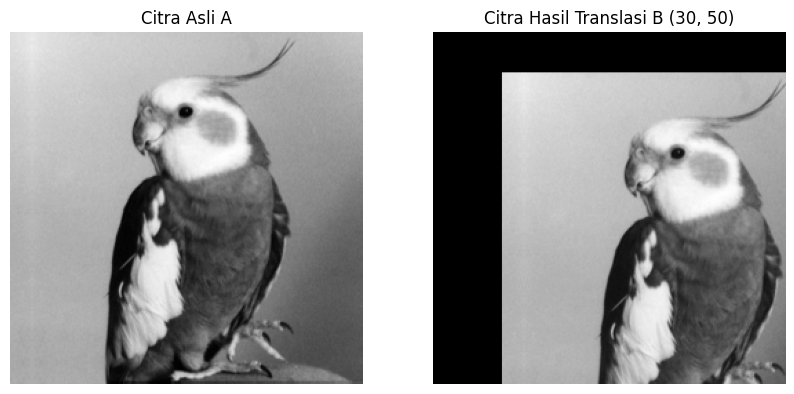

In [82]:
import numpy as np
import matplotlib.pyplot as plt

def translation(A, m, n):
    """Mentranslasi citra A sejauh (m, n) dengan latar belakang putih."""
    M, N = A.shape[:2]  # Mendapatkan ukuran citra
    B = np.full_like(A, 0)  # Inisialisasi citra hasil dengan putih (255)

    for i in range(M):
        for j in range(N):
            # Pastikan translasi masih dalam batas citra
            if 0 <= i + m < M and 0 <= j + n < N:
                B[i + m, j + n] = A[i, j]  # Geser pixel ke posisi baru

    return B

# 1️⃣ Baca citra grayscale dengan Matplotlib
image = plt.imread("bird.bmp")  # Baca gambar

# Pastikan format uint8 (jika gambar dalam bentuk float 0-1)
if image.dtype == np.float32 or image.dtype == np.float64:
    image = (image * 255).astype(np.uint8)

# 3️⃣ Tentukan nilai translasi
m_shift, n_shift = 30, 50  # Geser 30 piksel ke bawah, 50 ke kanan

# 4️⃣ Lakukan translasi citra
translated_image = translation(image, m_shift, n_shift)

# 5️⃣ Tampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Citra Asli A")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(translated_image, cmap="gray")
plt.title(f"Citra Hasil Translasi B ({m_shift}, {n_shift})")
plt.axis("off")

plt.show()


## Image Rotation Counter Clock-wise

void rotation90CCW(citra A, citra B, int M, int N)
/* Rotasi citra A sejauh 90
 berlawanan arah jarum jam (CCW = Clock Counter-
wise). Ukuran citra adalah M
 N. Hasil rotasi disimpan di dalam citra B.
*/
{ int i, j, k;
for (i=0; i<=M-1; i++)
{
k=N-1;
for (j=0; j<=N-1; j++)
{
B[k][i]=A[i][j];
k--;
}
}
}

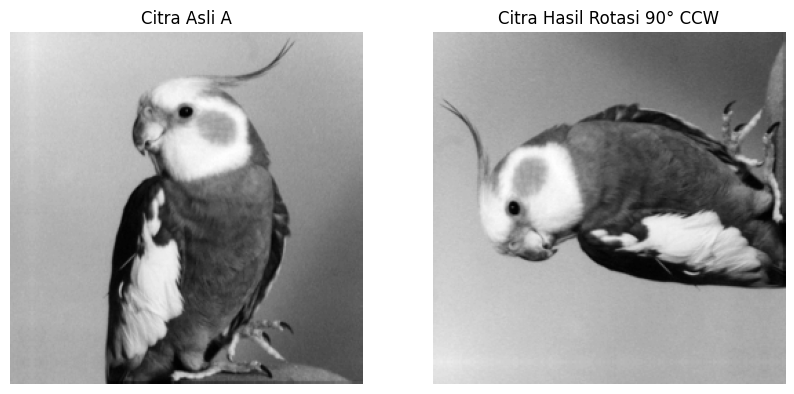

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def rotation90CCW(A):
    """Melakukan rotasi 90 derajat berlawanan arah jarum jam (CCW)."""
    M, N = A.shape  # Mendapatkan ukuran citra
    B = np.zeros((N, M), dtype=np.uint8)  # Inisialisasi citra hasil

    for i in range(M):
        k = N - 1  # Indeks untuk mengisi kolom dari belakang
        for j in range(N):
            B[k, i] = A[i, j]
            k -= 1  # Mengisi dari bawah ke atas

    return B

# 1️⃣ Baca citra grayscale dengan Matplotlib
image = plt.imread("bird.bmp")  # Baca gambar

# Pastikan format uint8 (jika gambar dalam bentuk float 0-1)
if image.dtype == np.float32 or image.dtype == np.float64:
    image = (image * 255).astype(np.uint8)

# 3️⃣ Lakukan rotasi 90 derajat CCW
rotated_image = rotation90CCW(image)

# 4️⃣ Tampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Citra Asli A")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rotated_image, cmap="gray")
plt.title("Citra Hasil Rotasi 90° CCW")
plt.axis("off")

plt.show()


## Image Rotation Clock-wise

void rotation90CW(citra A, citra B, int M, int N)
/* Rotasi citra A sejauh 90 searah jarum jam (CW = Clock-wise).
Ukuran citra adalah M
 N. Hasil rotasi disimpan di dalam cira B.
*/
{ int i, j, k;
k=N-1;
for (i=0; i<=M-1; i++)
{
for (j=0; j<=N-1; j++)
{
B[j][k]=A[i][j];
}
k--;
}
}

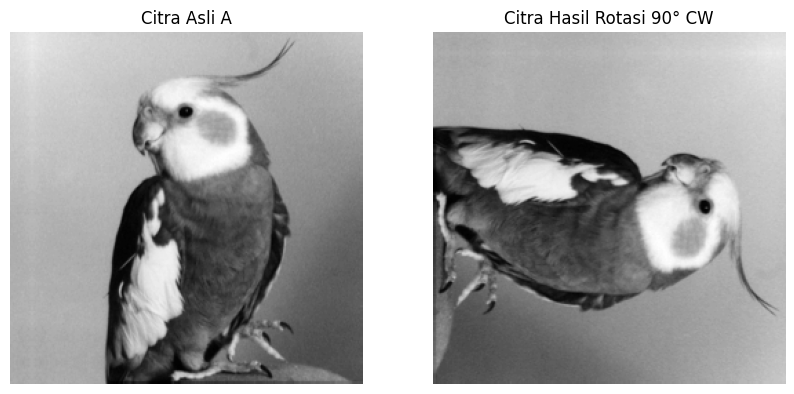

In [84]:
import numpy as np
import matplotlib.pyplot as plt

def rotation90CW(A):
    """Melakukan rotasi 90 derajat searah jarum jam (CW)."""
    M, N = A.shape  # Mendapatkan ukuran citra
    B = np.zeros((N, M), dtype=np.uint8)  # Inisialisasi citra hasil

    k = N - 1  # Indeks untuk mengisi kolom dari belakang
    for i in range(M):
        for j in range(N):
            B[j, k] = A[i, j]
        k -= 1  # Geser ke kiri untuk pengisian kolom selanjutnya

    return B

# 1️⃣ Baca citra grayscale dengan Matplotlib
image = plt.imread("bird.bmp")  # Baca gambar

# Pastikan format uint8 (jika gambar dalam bentuk float 0-1)
if image.dtype == np.float32 or image.dtype == np.float64:
    image = (image * 255).astype(np.uint8)

# 3️⃣ Lakukan rotasi 90 derajat CW
rotated_image = rotation90CW(image)

# 4️⃣ Tampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Citra Asli A")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rotated_image, cmap="gray")
plt.title("Citra Hasil Rotasi 90° CW")
plt.axis("off")

plt.show()

## Image Flipping

void vertical_flip(citra A, citra B, int M, int N)
/* Flipping vertikal (pencerminan terhadap sumbu-X) terhadap citar A. */
Ukuran citra adalah M
 N. Hasil flipping disimpan di dalam citra B.
*/
{ int i, j, k;
k=N-1;
for (i=0; i<=M-1; i++)
{
for (j=0; j<=N-1; j++)
{
B[k][j]=A[i][j];
}
k--;
}
}

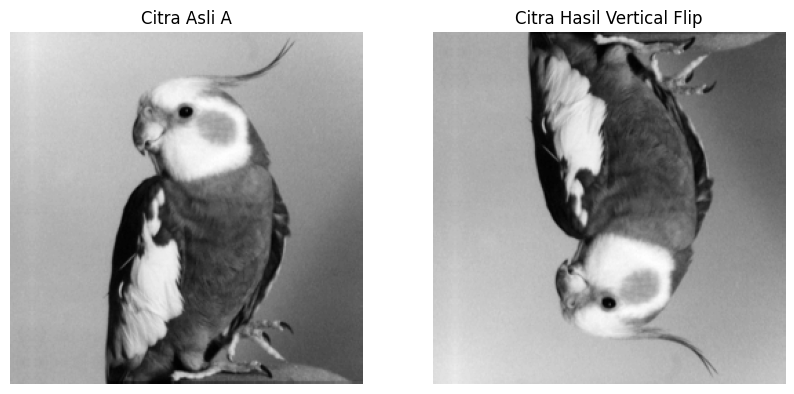

In [85]:
import numpy as np
import matplotlib.pyplot as plt

def vertical_flip(A):
    """Melakukan flipping vertikal terhadap sumbu X."""
    M, N = A.shape  # Mendapatkan ukuran citra
    B = np.zeros((M, N), dtype=np.uint8)  # Inisialisasi citra hasil

    k = M - 1  # Indeks untuk membalik gambar dari bawah ke atas
    for i in range(M):
        for j in range(N):
            B[k, j] = A[i, j]  # Pindahkan piksel dari A ke B dengan flipping
        k -= 1  # Kurangi indeks k agar baris berikutnya ditempatkan ke atas

    return B

# 1️⃣ Baca citra grayscale dengan Matplotlib
image = plt.imread("bird.bmp")  # Baca gambar

# Pastikan format uint8 (jika gambar dalam bentuk float 0-1)
if image.dtype == np.float32 or image.dtype == np.float64:
    image = (image * 255).astype(np.uint8)

# 3️⃣ Lakukan flipping vertikal
flipped_image = vertical_flip(image)

# 4️⃣ Tampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Citra Asli A")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(flipped_image, cmap="gray")
plt.title("Citra Hasil Vertical Flip")
plt.axis("off")

plt.show()

## Image Zooming

void zoom_out(citra A, citra B, int M, int N)
/* perbesaran citra A dengan faktor skala 2
Ukuran citra adalah M
 N. Hasil perbesaran disimpa d dalam citra B.
*/
{ int i, j, k, m, n;
m=0; n=0;
for (i=0; i<=M-1; i++)
{
for (j=0; j<=N-1; j++)
{
B[m][n]= A[i][j];
B[m][n+1]= A[i][j];
B[m+1][n]= A[i][j];
B[m+1][n+1]= A[i][j];
n=n+2;
}
m=m+2;
n=0;
}
}

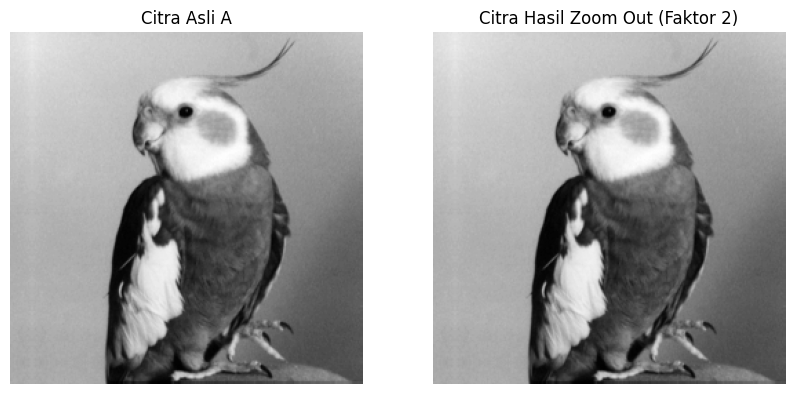

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def zoom_out(A):
    """Memperbesar citra dengan faktor skala 2."""
    M, N = A.shape  # Mendapatkan ukuran citra asli
    B = np.zeros((2 * M, 2 * N), dtype=np.uint8)  # Inisialisasi citra hasil

    m = 0  # Indeks baris pada citra hasil
    for i in range(M):
        n = 0  # Indeks kolom pada citra hasil
        for j in range(N):
            # Perbesar piksel A[i, j] menjadi 4 piksel di B
            B[m, n] = A[i, j]
            B[m, n+1] = A[i, j]
            B[m+1, n] = A[i, j]
            B[m+1, n+1] = A[i, j]
            n += 2  # Geser ke kolom berikutnya dalam citra hasil
        m += 2  # Geser ke baris berikutnya dalam citra hasil

    return B

# 1️⃣ Baca citra grayscale dengan Matplotlib
image = plt.imread("bird.bmp")  # Baca gambar

# Pastikan format uint8 (jika gambar dalam bentuk float 0-1)
if image.dtype == np.float32 or image.dtype == np.float64:
    image = (image * 255).astype(np.uint8)

# 3️⃣ Lakukan zoom out dengan faktor skala 2
zoomed_image = zoom_out(image)

# 4️⃣ Tampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Citra Asli A")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(zoomed_image, cmap="gray")
plt.title("Citra Hasil Zoom Out (Faktor 2)")
plt.axis("off")

plt.show()